# Opdracht 15

Train a decision tree to predict the species of a penguin based on their characteristics.

- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to schoose which columns you want to use as feature variables and you are also free to choose the maxx_depth of the tree. Note: Some machine learning algorithms can not handle missing values. You owill either need to 
    - Replace missing values (.fillna())
    - Remove rows with missing data (.dropna())
- Use your decision tree model to make predictions for both the train and test set
- Calculate the accuracy for both the train set predictions and test set predictions
- Is the accuracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree

In [1]:
import graphviz

import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
pg = sns.load_dataset("penguins")
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pg_train, pg_test = train_test_split(pg, test_size=0.3)

pg_train = pg_train.dropna()
pg_test = pg_test.dropna()

In [4]:
features = ["bill_length_mm", "bill_depth_mm"]
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(pg_train[features], pg_train["species"])

DecisionTreeClassifier(max_depth=3)

In [5]:
def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names = features,
                                   class_names= class_names,
                                   filled=True, rounded = True,
                                   special_characters = True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

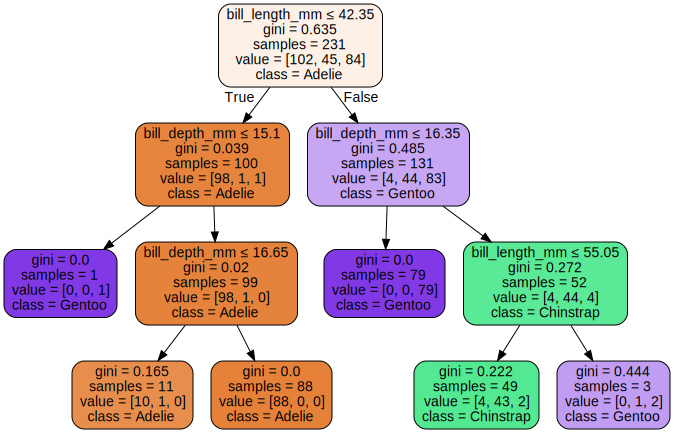

In [6]:
plot_tree_classification(dt, features, pg_train.species.unique())

In [7]:
 def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exeption("The amount of predictions did not equal the amount of actuals")
        
    return (predictions == actuals).sum() / len(actuals)

In [8]:
predictions = dt.predict(pg_train[features])
calculate_accuracy(predictions, pg_train.species)

0.9653679653679653

In [9]:
predictions = dt.predict(pg_test[features])
calculate_accuracy(predictions, pg_test.species)

0.8627450980392157

Er is hieronder te zien dat er een verschil van 0.03 is, ofwel 3%. 
Ik had dit verschil verwacht, omdat er 30% gebruikt wordt ipv 70% van de data, dus heeft het niet zo veel data om te trainen